# Machine Learning for Cancer Prediction 
The data used for this tutorial is an RNA-seq gene expression data for different cancer types. The rows represent cancer samples and the columns represent gene count values. The last column contains the cancer categories.

The original data can found here: https://archive.ics.uci.edu/ml/datasets/gene+expression+cancer+RNA-Seq#

## Required Libraries
 - numpy
 - matplotlib
 - seaborn
 - pandas
 - scikit

## Import Python libraries

In [1]:
#data handling
import pandas as pd
import numpy as np

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import MinMaxScaler

#feature selection
from sklearn.feature_selection import mutual_info_classif

#classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

# performance metrics
from sklearn.metrics import f1_score,precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
# remember confusion matrices lets import that and execute it later

C:\Users\Rohan\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Users\Rohan\anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict_stages
C:\Users\Rohan\anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will 

## Read data

In [2]:

#read data directly from a github repository

file_url='cancer_gene_expression.zip'
# we can also use direct csv or excel file from out local system and use pandas to read them.
dataframe=pd.read_csv(file_url)


In [3]:
dataframe.head()

,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,...,gene_7992,gene_7993,gene_7994,gene_7995,gene_7996,gene_7997,gene_7998,gene_7999,gene_8000,Cancer_Type
0,0.0,0.0,0.0,2.088413,0.0,0.0,0.0,0.0,0.550605,2.815760,...,11.558803,8.881802,6.014840,6.643534,11.740624,7.065012,9.932659,6.928584,2.088413,KIRC
1,0.0,0.0,0.0,3.205955,0.0,0.0,0.0,0.0,0.425244,2.354396,...,11.062829,9.032864,5.054193,6.432320,12.104985,7.300746,9.872796,5.039231,2.448002,KIRC
2,0.0,0.0,0.0,4.746646,0.0,0.0,0.0,0.0,2.639417,1.657091,...,12.497640,7.198160,0.943434,7.371690,11.202356,8.426588,11.176890,3.119738,4.433988,BRCA
3,0.0,0.0,0.0,1.173191,0.0,0.0,0.0,0.0,1.527371,2.732899,...,11.261713,8.725676,6.300418,6.036451,11.732303,7.559469,9.596453,2.863046,3.380342,KIRC
4,0.0,0.0,0.0,1.366532,0.0,0.0,0.0,0.0,0.000000,3.388355,...,12.241965,7.685204,5.142948,6.355788,11.493950,8.139444,10.189256,6.544487,0.839395,COAD


In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Columns: 8001 entries, gene_1 to Cancer_Type
dtypes: float64(8000), object(1)
memory usage: 48.9+ MB


In [5]:
dataframe.describe()

,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,...,gene_7991,gene_7992,gene_7993,gene_7994,gene_7995,gene_7996,gene_7997,gene_7998,gene_7999,gene_8000
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,...,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.026642,0.231049,0.010844,2.405459,0.005799,0.065640,0.022036,0.028394,0.703998,1.916364,...,6.737536,11.606781,8.284388,5.056489,6.681599,11.567069,7.644004,10.299866,6.212981,2.418248
std,0.136850,0.656692,0.153859,0.797236,0.052265,0.213557,0.148917,0.161606,0.779321,0.877010,...,1.152086,0.536356,0.996495,1.907506,0.481615,0.332096,0.646763,0.443605,1.425559,1.510189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.711275,9.227476,4.256037,0.000000,4.753610,10.245493,5.833191,8.850653,0.713256,0.000000
25%,0.000000,0.000000,0.000000,1.898595,0.000000,0.000000,0.000000,0.000000,0.000000,1.357214,...,5.990978,11.303079,7.741703,3.789875,6.410729,11.370420,7.247358,10.036599,5.388155,1.355524
50%,0.000000,0.000000,0.000000,2.358284,0.000000,0.000000,0.000000,0.000000,0.518031,1.877862,...,6.795390,11.561670,8.393605,5.137995,6.725305,11.579127,7.682742,10.260555,6.219147,2.266787
75%,0.000000,0.000000,0.000000,2.929355,0.000000,0.000000,0.000000,0.000000,1.123931,2.486792,...,7.540330,11.854198,8.957813,6.458705,7.007823,11.765257,8.070051,10.515887,7.100357,3.238603
max,1.482332,6.575004,3.778061,4.746646,0.570754,1.866275,2.169925,2.375957,4.541670,4.932231,...,9.582974,14.146465,11.171433,10.590147,10.577240,12.730315,10.564759,13.031698,11.281391,9.738466



## Data Exploration & Cleaning




In [6]:
#let's check the number of samples and features
#note:the last column contain the labels. it is not considered as a feature

print(dataframe.shape)

(801, 8001)


In [40]:
dataframe.columns

Index(['gene_1', 'gene_2', 'gene_3', 'gene_4', 'gene_5', 'gene_6', 'gene_7',
       'gene_8', 'gene_9', 'gene_10',
       ...
       'gene_7992', 'gene_7993', 'gene_7994', 'gene_7995', 'gene_7996',
       'gene_7997', 'gene_7998', 'gene_7999', 'gene_8000', 'Cancer_Type'],
      dtype='object', length=8001)

In [7]:
#let's check some of the columns (first, second and third columns)
print(dataframe.columns[0:3])

Index(['gene_1', 'gene_2', 'gene_3'], dtype='object')


In [8]:
#lets check the name of the last column of this dataframe

dataframe.columns[-1]

'Cancer_Type'

In [9]:
#check for missing values
datanul=dataframe.isnull().sum()
g=[i for i in datanul if i>0]

print('columns with missing values:%d'%len(g))

columns with missing values:0


**yes we have done it till here, lets continue.** 

In [10]:
#let's check how many different cancer types are there in the data
#note: in this tutorial the cancer types will be referred to as classes or labels

print(dataframe['Cancer_Type'].value_counts())

BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: Cancer_Type, dtype: int64


We can see that there are 5 classes/cancer types. And you can also see the number of samples diagnosed with a cancer type
      

<AxesSubplot:>

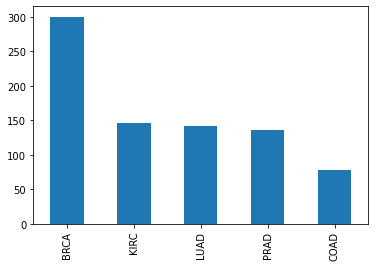

In [11]:
#plot a bar chat to display the class distribution

dataframe['Cancer_Type'].value_counts().plot.bar()

 
## **Data preprocesing** 
This is done to put the data in an appropriate format before modelling


In [12]:
#we will now seperate the feature values from the class. we do this because scikit-learn requires that features and class are separated before parsing them to the classifiers.

X=dataframe.iloc[:,0:-1]
y=dataframe.iloc[:,-1]

In [13]:
print(X.head())

   gene_1  gene_2  gene_3    gene_4  gene_5  gene_6  gene_7  gene_8    gene_9  \
0     0.0     0.0     0.0  2.088413     0.0     0.0     0.0     0.0  0.550605   
1     0.0     0.0     0.0  3.205955     0.0     0.0     0.0     0.0  0.425244   
2     0.0     0.0     0.0  4.746646     0.0     0.0     0.0     0.0  2.639417   
3     0.0     0.0     0.0  1.173191     0.0     0.0     0.0     0.0  1.527371   
4     0.0     0.0     0.0  1.366532     0.0     0.0     0.0     0.0  0.000000   

    gene_10  ...  gene_7991  gene_7992  gene_7993  gene_7994  gene_7995  \
0  2.815760  ...   6.883022  11.558803   8.881802   6.014840   6.643534   
1  2.354396  ...   6.271456  11.062829   9.032864   5.054193   6.432320   
2  1.657091  ...   8.417734  12.497640   7.198160   0.943434   7.371690   
3  2.732899  ...   4.767210  11.261713   8.725676   6.300418   6.036451   
4  3.388355  ...   7.594086  12.241965   7.685204   5.142948   6.355788   

   gene_7996  gene_7997  gene_7998  gene_7999  gene_8000  
0  

In [14]:
X.shape

(801, 8000)

In [15]:
print(y.head())

0    KIRC
1    KIRC
2    BRCA
3    KIRC
4    COAD
Name: Cancer_Type, dtype: object


In [16]:
y.shape

(801,)

\
**Encode labels**

The labels for this data are categorical and we therefore have to convert them to numeric forms. This is referred to as encoding. Machine learning models usually require input data to be in numeric forms, hence we encoding the labels.

In [17]:
#let's encode target labels (y) with values between 0 and n_classes-1.
#encoding will be done using the LabelEncoder
label_encoder=LabelEncoder()
label_encoder.fit(y)
y_encoded=label_encoder.transform(y)
labels=label_encoder.classes_
classes=np.unique(y_encoded)

In [18]:
labels

array(['BRCA', 'COAD', 'KIRC', 'LUAD', 'PRAD'], dtype=object)

In [19]:
classes

array([0, 1, 2, 3, 4], dtype=int64)

\
**Data Splitting**\
We will now split the data into training and test subsets.
The training data is initially parsed to the machine learning model. this is to enable the model to identify discriminatory patterns which can be used to make future predictions.
The testing data is used to evaluate the model after the training phase.

In [20]:
#split data into training and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y_encoded,test_size=0.2,random_state=42)

In [21]:
dataframe.iloc[:,0:10].describe()

,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.026642,0.231049,0.010844,2.405459,0.005799,0.065640,0.022036,0.028394,0.703998,1.916364
std,0.136850,0.656692,0.153859,0.797236,0.052265,0.213557,0.148917,0.161606,0.779321,0.877010
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.898595,0.000000,0.000000,0.000000,0.000000,0.000000,1.357214
50%,0.000000,0.000000,0.000000,2.358284,0.000000,0.000000,0.000000,0.000000,0.518031,1.877862
75%,0.000000,0.000000,0.000000,2.929355,0.000000,0.000000,0.000000,0.000000,1.123931,2.486792
max,1.482332,6.575004,3.778061,4.746646,0.570754,1.866275,2.169925,2.375957,4.541670,4.932231


\
**Data Normalization**\
Data normalization is done so that the values are in the same range. This will improve model performance and avoid bias

In [22]:
# scale data between 0 and 1

min_max_scaler=MinMaxScaler()
X_train_norm=min_max_scaler.fit_transform(X_train)
X_test_norm=min_max_scaler.fit_transform(X_test)

## **Feature Selection**
The purpose of feature selection is to select relevant features for classification. 
Feature selection is usually used as a pre-processing step before doing the actual learning. 

In this tutorial, mutual information algorithm is used to compute the relevance of each feature. The top n (eg. 300) features are selected for the machine learning analysis.

### Feature Selection using Mutual Information

In [23]:
MI=mutual_info_classif(X_train_norm,y_train)

In [24]:
#select top n features. lets say 300.
#you can modify the value and see how the performance of the model changes

n_features=300
selected_scores_indices=np.argsort(MI)[::-1][0:n_features]

In [25]:
X_train_selected=X_train_norm[:,selected_scores_indices]
X_test_selected=X_test_norm[:,selected_scores_indices]

In [26]:
X_train_selected.shape

(640, 300)

In [27]:
X_test_selected.shape

(161, 300)

## Classification
The random forest classifier is used in this tutorial. Random forest works with multiclass and high dimensional data. Classification will involve training and testing of the model

### Model Training
Training allows the machine learning model to learn from the data and use the identified patterns to predict the outcomes of data it has never seen before.
In the training phase, the model is given the training subset. In this tutorial, the Random Forest Classifier is used.

In [28]:
#Random Forest Classifier
#because we are dealing with multiclass data, the one versus rest strategy is used.
#learn to predict each class against the other.

RF=OneVsRestClassifier(RandomForestClassifier(max_features=0.2))
RF.fit(X_train_selected,y_train)
y_pred =RF.predict(X_test_selected)
pred_prob = RF.predict_proba(X_test_selected)

C:\Users\Rohan\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:482: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_store_unique_indices = np.zeros(y.shape, dtype=np.int)
C:\Users\Rohan\anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curr

C:\Users\Rohan\anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\Rohan\anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the 

C:\Users\Rohan\anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\Rohan\anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the 

C:\Users\Rohan\anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\Rohan\anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the 

### Model Evaluation

After training the model, it is important to know how the model performs on an independent data(i.e. the test data). The following metrics are used to evaluate the model
- accuracy
- precision
- recall
- f1 score
- confusion matrix
- ROC Curve



In [29]:
#accuracy
#accuracy=np.round(balanced_accuracy_score(y_test,y_pred),4)
#print('accuracy:%0.4f'%accuracy)

#precision
precision=np.round(precision_score(y_test,y_pred,average = 'weighted'),4)
print('precision:%0.4f'%precision)

#recall
recall=np.round(recall_score(y_test,y_pred,average = 'weighted'),4)
print('recall:%0.4f'%recall)

#f1score
f1score=np.round(f1_score(y_test,y_pred,average = 'weighted'),4)
print('f1score:%0.4f'%f1score)


report=classification_report(y_test,y_pred, target_names=labels)
print('\n')
print('classification report\n\n')
print(report)

precision:0.9226
recall:0.9130
f1score:0.9132


classification report


             precision    recall  f1-score   support

       BRCA       0.95      0.93      0.94        60
       COAD       0.75      0.94      0.83        16
       KIRC       1.00      0.75      0.86        28
       LUAD       0.81      0.92      0.86        24
       PRAD       0.97      1.00      0.99        33

avg / total       0.92      0.91      0.91       161



In [35]:
from sklearn.metrics import confusion_matrix
cm_df=confusion_matrix(y_test, y_pred)

In [38]:
cm_df

array([[56,  1,  0,  3,  0],
       [ 0, 15,  0,  1,  0],
       [ 2,  3, 21,  1,  1],
       [ 1,  1,  0, 22,  0],
       [ 0,  0,  0,  0, 33]], dtype=int64)

Text(33.0, 0.5, 'True Labels')

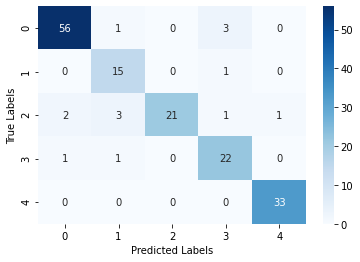

In [36]:
#visualize the confusion matrix using seaborn

sns.heatmap(cm_df,annot=True,cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

In [ ]:
#visualize the confusion matrix directly
#disp=plot_confusion_matrix(RF,X_test_selected,y_test,xticks_rotation='vertical',
#                    cmap='Blues',display_labels=labels)

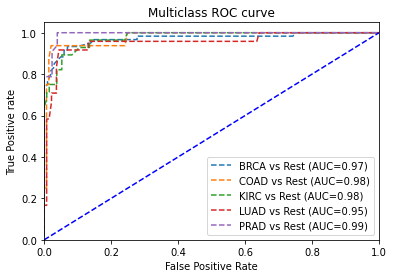

In [39]:
#roc curves will be generated for each class
#we will therefore have to binarize the y_test labels
#this is done because the probabilities(pred_prob) are calculated for each each class
#we therefore need to put the y_test label in the same format as the pred_prob
y_test_binarized=label_binarize(y_test,classes=classes)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.2f)'%(labels[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()    

In [ ]:
by Rohan.